Invoke-WebRequest -Uri "https://www.scss.tcd.ie/Doug.Leith/CSU44061/week2.php" -OutFile "week2.csv"

# id:8--8-8 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn import metrics
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
import statistics

Question a

In [2]:
data = pd.read_csv("week2.csv")
data.reset_index(inplace=True)          
data.columns = ['X1', 'X2', 'y']        
data.head()  
#reset the index of DataFrame to make it a column for the numeric index provided by pandas 
#define column header by using data.columns[]
#generate results by data.head()                           

,X1,X2,y
0,-0.88,-0.37,1
1,0.48,-0.95,-1
2,0.94,0.38,1
3,-0.32,-0.88,-1
4,-0.16,0.42,1


In [3]:
df = data.copy()                        
df.head() 
#copy a new data parameter from data to df
#generate results again                              

,X1,X2,y
0,-0.88,-0.37,1
1,0.48,-0.95,-1
2,0.94,0.38,1
3,-0.32,-0.88,-1
4,-0.16,0.42,1


In [4]:
X1 = df.iloc[:, 0]                     #integer based index 0
X2 = df.iloc[:, 1]                     #integer based index 1
X = np.column_stack((X1, X2))          #combine into a a stack
y = df.iloc[:, 2]                      #integer based index 2
#define integer location in DataFrame

Question a(i)

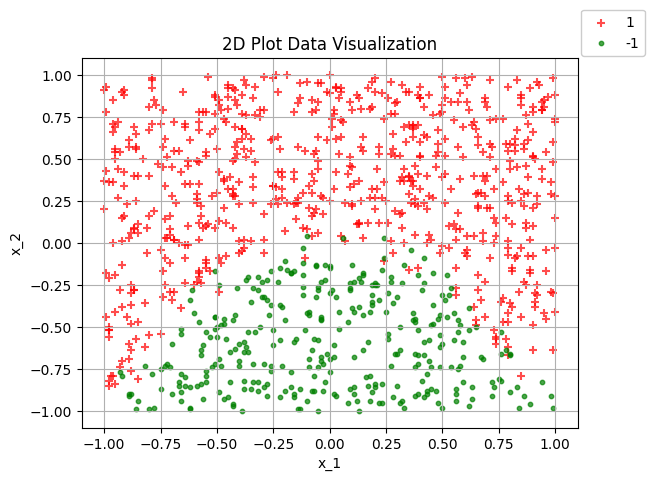

In [5]:
plt.scatter(X1[y == 1], X2[y == 1], c='r', marker = '+', label='1', alpha = 0.7)                   
plt.scatter(X1[y == -1], X2[y == -1], c='g', marker = 'o', label='-1', s = 10, alpha = 0.7)        
plt.xlabel('x_1')               #name the x lable
plt.ylabel('x_2')               #name the y lable
plt.legend(bbox_to_anchor=(1.15,1.15), loc='upper right', fancybox=True, framealpha=1, fontsize=10)
plt.title('2D Plot Data Visualization')
plt.grid(True)
plt.show()
#use plt.scatter to plot scatter chart base on the filtered X1 and X2
#c defines color; marker defines the symbol
#lable specifies the lable for data points; s means sizes

The plot shows a clear separation between the two classes, with the `+1` class represented by red plus markers predominantly occupying the upper region, and the `-1` class represented by green circle markers mostly located in the lower region. This suggests that the two features, `x_1` and `x_2`, provide strong discriminative power between the two target classes.

Question a(ii)

In [6]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4) 
# train_test_split: This is a function typically provided by a machine learning library like scikit-learn 
# It is used to split a dataset into two or more subsets, typically for training and testing purposes.
# prepare the logistic regression model for predictions
# y stands for target variable
# 0.2 means 20 percent for test and 80 percent for train
# random seed 4
print('80% Train Set', x_train.shape, y_train.shape)
print('20% Test Set', x_test.shape, y_test.shape)      #output results

# Initialize and train the logistic regression model
LR = LogisticRegression()
LR.fit(x_train, y_train)

# Training set accuracy
train_score = LR.score(x_train, y_train)
print('Training Accuracy: [', train_score * 100, "% ]")

# Test set accuracy
test_score = LR.score(x_test, y_test)
print('Test Accuracy: [', test_score * 100, "% ]")

80% Train Set (799, 2) (799,)
20% Test Set (200, 2) (200,)
Training Accuracy: [ 86.98372966207761 % ]
Test Accuracy: [ 87.0 % ]


In [7]:
# Model parameter
slope = LR.coef_[0]                     #slope == coefficients       
intercept = LR.intercept_                 
print('The slopes are: ', slope)          
print('The intercept is: ', intercept)

# linear model y = theta0 + theta1 * X1 + theta2 * X2
# This code initializes and trains a Logistic Regression model on x_train and y_train, 
# learning how input features influence predictions. 
# It then calculates and displays the model's coefficients (slopes/weights) and intercept (bias), 
# providing insight into feature importance. 
# Finally, the code predicts outcomes on the training data and reports the accuracy score, 
# quantifying the model's performance in classification tasks.

The slopes are:  [-0.11419042  5.33056212]
The intercept is:  [1.61808321]


Feature: 0, Score: -0.11419
Feature: 1, Score: 5.33056


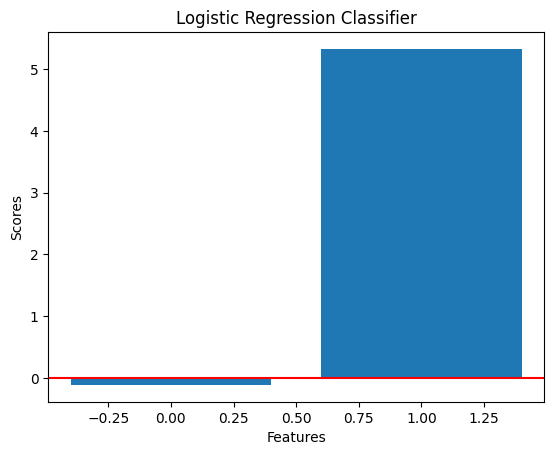

In [8]:
feature = LR.coef_[0]
for i, val in enumerate(feature):							
	print('Feature: %0d, Score: %.5f' % (i, val))			
plt.bar([x for x in range(len(feature))], feature)		
plt.xlabel('Features')
plt.ylabel('Scores')
plt.axhline(y=0, color='red', linestyle='-')
plt.title('Logistic Regression Classifier')
plt.show()
#the for loop iterate over the element of the feature array
#enumerate() loop through feature while keep track of the index i and value j
#hence we know the feature1 has most influence and may cause the score increase due to the high score it got
#feature 0 have a relatively small score which indicates that it has a lower influence and may cause the score decrease

#Feature 0 corresponds to the first column of the dataset(x_1)
#Feature 1 corresponds to the second column of the dataset(x_2)

1. Feature 1 (X2) plays a dominant role in influencing the predictions, as its contribution is significantly higher than Feature 0 (X1).
2. The negative value of Feature 0 means it slightly pushes predictions toward -1, but its effect is minimal compared to Feature 1.

In [9]:
# Confusion Matrix for Training Set
prediction_train = LR.predict(x_train)
confusionMatrix_train = metrics.confusion_matrix(y_train, prediction_train)
print(confusionMatrix_train)

print()

# Classification Report for Training Set
classificationReprot_train = metrics.classification_report(y_train, prediction_train)
print(classificationReprot_train)

[[216  54]
 [ 50 479]]

              precision    recall  f1-score   support

          -1       0.81      0.80      0.81       270
           1       0.90      0.91      0.90       529

    accuracy                           0.87       799
   macro avg       0.86      0.85      0.85       799
weighted avg       0.87      0.87      0.87       799



Text(0.5, 1.0, 'Accuracy: 87.0')

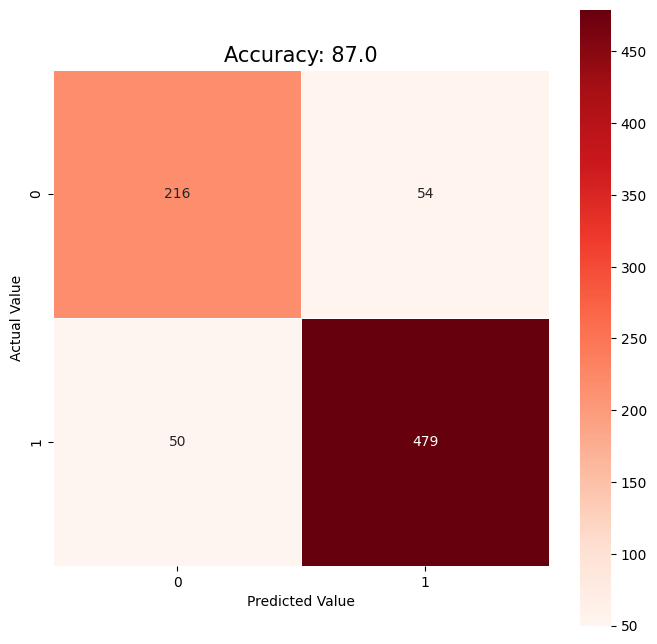

In [10]:
plt.figure(figsize=(8,8))
sns.heatmap(confusionMatrix_train, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Reds')
plt.ylabel('Actual Value')
plt.xlabel('Predicted Value')
all_sample_title = 'Accuracy: {0}'.format(test_score * 100)
plt.title(all_sample_title, size = 15)

Confution Matrix Heatmap
1. The model performs reasonably well with 87% accuracy, though there is room for improvement in reducing false positives and false negatives.
2. The number of false negatives and false positives is fairly balanced, suggesting the model doesn't overly favor one class over the other.

Question a(iii)

1. The decision boundary is computed based on the logistic regression equation:
    1. z = coef0 * X1 + coef1 * X2 + intercept
2. The decision boundary occurs when the model's output z = 0, which is the threshold for classification between +1 and -1. Solving for X2 gives:
    1. X2 = - (coef0/coef1) * X1 - (intercept/coef1)

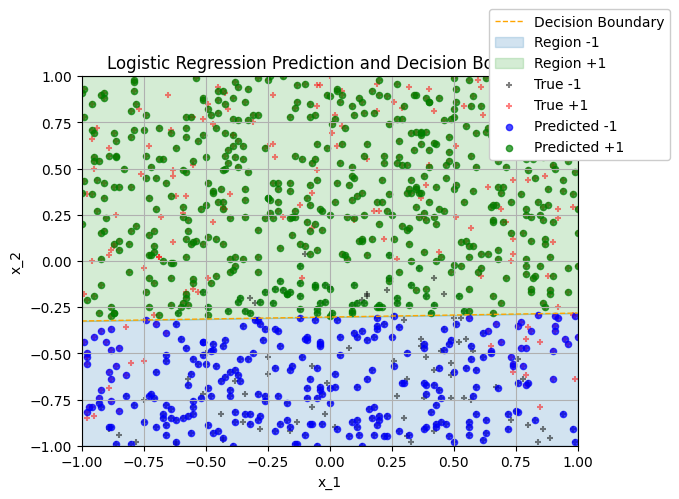

In [11]:
# Extract the intercept and coefficients of the logistic regression model
intercept = LR.intercept_[0]                                     
coef_0, coef_1 = LR.coef_.T                                      
slope_d = -coef_0 / coef_1                                       
intercept_d = -intercept / coef_1                                 

# Generate and plot the decision boundary line
x_d = np.array([-1, +1])                                          
y_d = slope_d * x_d + intercept_d                                 
plt.plot(x_d, y_d, lw=1, ls='--', c='orange', label='Decision Boundary')

plt.fill_between(x_d, y_d, -1, color='tab:blue', alpha=0.2, label='Region -1')
plt.fill_between(x_d, y_d, +1, color='tab:green', alpha=0.2, label='Region +1')

# original data points
plt.scatter(*X[y == -1].T, s=15, alpha=0.5, c='black', marker='+', label='True -1')
plt.scatter(*X[y == +1].T, s=15, alpha=0.5, c='red', marker='+', label='True +1')
# predictions
plt.scatter(*x_train[prediction_train == -1].T, s=20, alpha=0.7, c='blue', marker='o', label='Predicted -1')
plt.scatter(*x_train[prediction_train == +1].T, s=20, alpha=0.7, c='green', marker='o', label='Predicted +1')

plt.xlim(-1, +1)
plt.ylim(-1, +1)
plt.xlabel('x_1')
plt.ylabel('x_2')

plt.legend(bbox_to_anchor=(1.2,1.2), loc='upper right', fancybox=True, framealpha=1, fontsize=10, ncol=1)
plt.title('Logistic Regression Prediction and Decision Boundary')
plt.grid(True)
plt.show()


Question a(iv)

1. The predicted points (o markers in blue and green) are closely following the actual labels (+ markers in black and red). However, there might be some overlap between predictions and true labels in certain regions. The confusion matrix from the earlier result showed that the model has an accuracy of 87%, which indicates a reasonably good performance. 
2. The linear decision boundary appears to work well for most of the dataset. Given the high accuracy and clear separation in most of the plot, the linear model is a good fit for this problem.

Question b(i)

In [12]:
# For C = 0.001 (high regularization, soft margin)
linearSVC001 = LinearSVC(C=0.001)                         
print(linearSVC001)                                       
linearSVC001.fit(x_train, y_train)                        
score = linearSVC001.score(x_train, y_train)
crossv_scores = cross_val_score(linearSVC001, x_train, y_train, cv=10)
print("C = 0.001 Score: ", score)                                         # Print training accuracy
print("C = 0.001 cross val average score: %.2f" % crossv_scores.mean())   # Cross-validation score
print('C = 0.001 coefficients are: ',linearSVC001.coef_[0])               # Model coefficients
print('C = 0.001 intercept is: ',linearSVC001.intercept_)                 # Model intercept
#This code initializes a Linear Support Vector Classification (LinearSVC) model 
#with a specified regularization parameter (C=0.001). 
#It then prints the details of the model. 
#The model is trained on the training data and its accuracy score on the training data is
#computed and stored in the variable "score." This score quantifies how well the LinearSVC model fits the training data.

LinearSVC(C=0.001)
C = 0.001 Score:  0.8523153942428036
C = 0.001 cross val average score: 0.84
C = 0.001 coefficients are:  [0.01820011 0.43062266]
C = 0.001 intercept is:  [0.19480572]


In [13]:
# For C = 1 (moderate regularization)
linearSVC1 = LinearSVC(C=1)                              
print(linearSVC1)                                        
linearSVC1.fit(x_train, y_train)                         
score = linearSVC1.score(x_train, y_train)
crossv_scores = cross_val_score(linearSVC1, x_train, y_train, cv=10)
print("C = 1 Score: ", score)                                                 # Print training accuracy   
print("C = 1 cross val average score: %.2f" % crossv_scores.mean())           # Cross-validation score                                         
print('C = 1 coefficients are: ',linearSVC1.coef_[0])                         # Model coefficients                           
print('C = 1 intercept is: ',linearSVC1.intercept_)                           # Model intercept                       
#This code initializes a Linear Support Vector Classification (LinearSVC) model 
#with a specified regularization parameter (C=1). 
#It then prints the details of the model. 
#The model is trained on the training data and its accuracy score on the training data is
#computed and stored in the variable "score." This score quantifies how well the LinearSVC model fits the training data.

LinearSVC(C=1)
C = 1 Score:  0.869837296620776
C = 1 cross val average score: 0.87
C = 1 coefficients are:  [-0.05283858  1.96841964]
C = 1 intercept is:  [0.58464361]


In [14]:
# For C = 100 (low regularization, hard margin)
linearSVC100 = LinearSVC(C=100, dual=False)                          
print(linearSVC100)                                                  
linearSVC100.fit(x_train, y_train)                                   
score = linearSVC100.score(x_train, y_train)                          
crossv_scores = cross_val_score(linearSVC100, x_train, y_train, cv=10)
print("C = 100 Score: ", score)                                                     # Print training accuracy
print("C = 100 cross val average score: %.2f" % crossv_scores.mean())               # Cross-validation score  
print('C = 100 The coefficients are: ',linearSVC100.coef_[0])                       # Model coefficients      
print('C = 100 The intercept is: ',linearSVC100.intercept_)                         # Model intercept         
#This code initializes a Linear Support Vector Classification (LinearSVC) model 
#with a specified regularization parameter (C=100). 
#It then prints the details of the model. 
#The model is trained on the training data and its accuracy score on the training data is
#computed and stored in the variable "score." This score quantifies how well the LinearSVC model fits the training data.

LinearSVC(C=100, dual=False)
C = 100 Score:  0.869837296620776
C = 100 cross val average score: 0.87
C = 100 The coefficients are:  [-0.05564083  2.00383319]
C = 100 The intercept is:  [0.59574052]


1. Accuracy
    1. Logistic Regression has a training accuracy of 87% and LinearSVC models with C = 1 and C = 100 achieve nearly the same score (86.9%).
    2. The model with C = 0.001 has a lower accuracy of 85.2%, which means that stronger regularization reduces the ability of the model to fit the data 
2. Coefficients (Weights)
    1. Logistic Regression shows Feature 1 is dominant in the predictions, and Feature 0 has a much smaller effect.
    2. LinearSVC (C = 0.001) has much smaller coefficients (0.0182 for Feature 0 and 0.4306 for Feature 1), this might lead to less sharp decision boundaries and lower accuracy
    3. LinearSVC (C = 1) and LinearSVC (C = 100) show coefficients that are more in line with the logistic regression model, but still smaller:
        1. For Feature 1, the weights are 1.9684 for C = 1 and 2.0038 for C = 100, much lower than logistic regression's 5.33.
        2. For Feature 0, the weights are also negative (-0.0528 for C = 1 and -0.0556 for C = 100), but smaller than logistic regression's -0.11419.
3. Intercept
    1. The intercept for Logistic Regression is 0.611, which is very close to the intercept for LinearSVC C = 1 (0.5846) and LinearSVC C = 100 (0.5957).
    2. For LinearSVC C = 0.001, the intercept is much smaller (0.1948), suggesting that the model is less sensitive to shifting the decision boundary when regularization is high.
4. Conclusion: Logistic Regression and LinearSVC (C = 1 and C = 100) produce similar results in terms of accuracy.

Question b(ii)

1. A linear SVM finds the decision boundary by maximizing the margin between two classes. The decision boundary is the set of points x where the decision function equals zero:
    1. w ⋅ x + b = 0
    2. w = [w1 , w2] is the vector of model coefficients.
    3. b is the intercept (bias term)
    4. In 2D, the equation is: w1x1 + w2x2 + b = 0
    5. Hence we can solve for x2 (vertical axis), to get the decisio boundary line: x2 = (-w1/w2) x1 - (b/w2)
        1. slope of the decision boundary: -w1/w2
        2. intercept of the decision boundary: -b/w2

[[177  93]
 [ 25 504]]

              precision    recall  f1-score   support

          -1       0.88      0.66      0.75       270
           1       0.84      0.95      0.90       529

    accuracy                           0.85       799
   macro avg       0.86      0.80      0.82       799
weighted avg       0.86      0.85      0.85       799



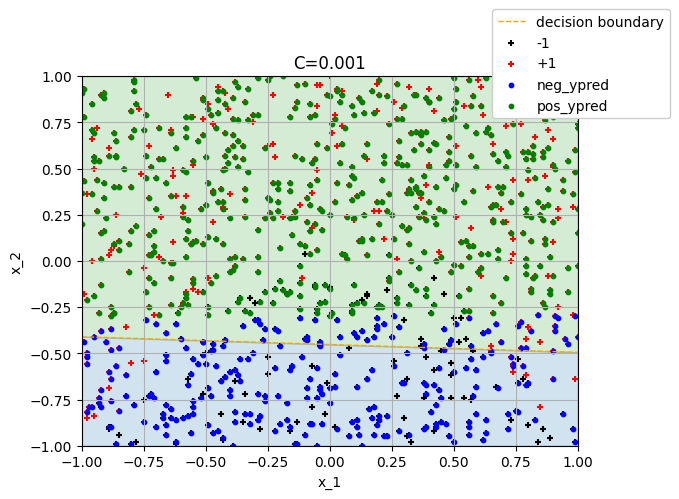

In [29]:
ypred_c001 = linearSVC001.predict(x_train)
confution_matrix_c001 = confusion_matrix(y_train, ypred_c001)
print(confution_matrix_c001)

print()

classification_report_c001 = metrics.classification_report(y_train, ypred_c001)
print(classification_report_c001)

intercept_SVC001 = linearSVC001.intercept_[0]
feature0_SVC001, feature1_SVC001 = linearSVC001.coef_.T
intercept_d_SVC001 = -intercept_SVC001 / feature1_SVC001
slope_d_SVC001 = -feature0_SVC001 / feature1_SVC001
x_d_SVC001 = np.array([-1, +1])
y_d_SVC001 = slope_d_SVC001 * x_d_SVC001 + intercept_d_SVC001

plt.plot(x_d_SVC001, y_d_SVC001, lw = 1, ls = '--', c = 'orange', label='decision boundary')   

plt.fill_between(x_d_SVC001, y_d_SVC001, -1, color='tab:blue', alpha=0.2)
plt.fill_between(x_d_SVC001, y_d_SVC001, +1, color='tab:green', alpha=0.2)

plt.scatter(*X[y == -1].T, s = 15, c = 'black', marker = '+', label='-1')
plt.scatter(*X[y == +1].T, s = 15, c = 'red', marker = '+', label='+1')
plt.scatter(*x_train[prediction_train == -1].T, s = 10, c = 'blue', marker = 'o', label='neg_ypred')
plt.scatter(*x_train[prediction_train == +1].T, s = 10, c = 'green', marker = 'o', label='pos_ypred')   
plt.xlim(-1, +1)
plt.ylim(-1, +1)
plt.xlabel('x_1')
plt.ylabel('x_2')
plt.legend(bbox_to_anchor=(1.2,1.2), loc='upper right', fancybox=True, framealpha=1,fontsize=10,ncol=1)
plt.title('C=0.001')
plt.grid(True)
plt.show()
#The code defines a range of x-values (x_d_SVC001)
#and calculates the corresponding y-values (y_d_SVC001) using the slope and intercept. 
#These values are used to plot the decision boundary.
#The visual representation helps visualize how the LinearSVC model distinguishes between different classes.       

[[217  53]
 [ 51 478]]

              precision    recall  f1-score   support

          -1       0.81      0.80      0.81       270
           1       0.90      0.90      0.90       529

    accuracy                           0.87       799
   macro avg       0.85      0.85      0.85       799
weighted avg       0.87      0.87      0.87       799



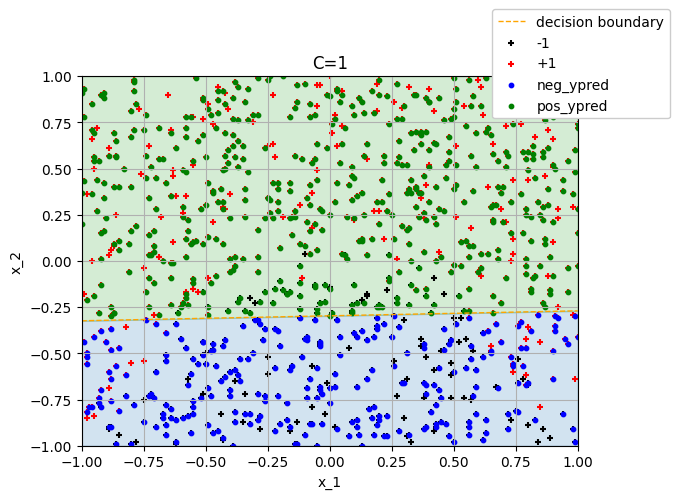

In [30]:
ypred_c1 = linearSVC1.predict(x_train)
confution_matrix_c1 = confusion_matrix(y_train, ypred_c1)
print(confution_matrix_c1)

print()

classification_report_c1 = metrics.classification_report(y_train, ypred_c1)
print(classification_report_c1)

intercept_SVC1 = linearSVC1.intercept_[0]                                                    #Use C=0.001 classifiers to 
feature0_SVC1, feature1_SVC1 = linearSVC1.coef_.T                                            #predict the target values in the training data   
intercept_d_SVC1 = -intercept_SVC1 / feature1_SVC1
slope_d_SVC1 = -feature0_SVC1 / feature1_SVC1
x_d_SVC1 = np.array([-1, +1])
y_d_SVC1 = slope_d_SVC1 * x_d_SVC1 + intercept_d_SVC1

plt.plot(x_d_SVC1, y_d_SVC1, lw = 1, ls = '--', c = 'orange', label='decision boundary')   

plt.fill_between(x_d_SVC1, y_d_SVC1, -1, color='tab:blue', alpha=0.2)
plt.fill_between(x_d_SVC1, y_d_SVC1, +1, color='tab:green', alpha=0.2)    

plt.scatter(*X[y == -1].T, s = 15, c = 'black', marker = '+', label='-1')
plt.scatter(*X[y == +1].T, s = 15, c = 'red', marker = '+', label='+1')                     #plot the original data
plt.scatter(*x_train[prediction_train == -1].T, s = 10, c = 'blue', marker = 'o', label='neg_ypred')
plt.scatter(*x_train[prediction_train == +1].T, s = 10, c = 'green', marker = 'o', label='pos_ypred')    #plot the training data point
plt.xlim(-1, +1)
plt.ylim(-1, +1)                                                                             #setting boundary
plt.xlabel('x_1')
plt.ylabel('x_2')
plt.legend(bbox_to_anchor=(1.2,1.2), loc='upper right', fancybox=True, framealpha=1,fontsize=10,ncol=1)
plt.title('C=1')
plt.grid(True)
plt.show() 
#The code defines a range of x-values (x_d_SVC1)
#and calculates the corresponding y-values (y_d_SVC1) using the slope and intercept. 
#These values are used to plot the decision boundary.
#The visual representation helps visualize how the LinearSVC model distinguishes between different classes.   

[[217  53]
 [ 51 478]]

              precision    recall  f1-score   support

          -1       0.81      0.80      0.81       270
           1       0.90      0.90      0.90       529

    accuracy                           0.87       799
   macro avg       0.85      0.85      0.85       799
weighted avg       0.87      0.87      0.87       799



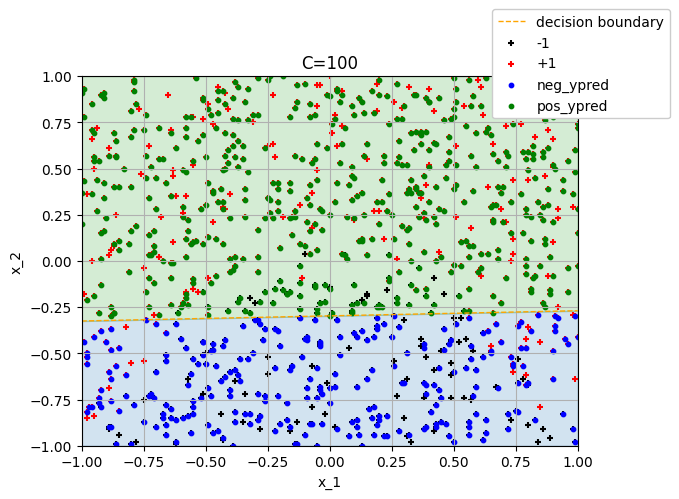

In [31]:
ypred_c100 = linearSVC100.predict(x_train)
confution_matrix_c100 = confusion_matrix(y_train, ypred_c100)
print(confution_matrix_c100)

print()

classification_report_c100 = metrics.classification_report(y_train, ypred_c100)
print(classification_report_c100)

intercept_SVC100 = linearSVC100.intercept_[0]                                                    #Use C=0.001 classifiers to 
feature0_SVC100, feature1_SVC100 = linearSVC100.coef_.T                                            #predict the target values in the training data   
intercept_d_SVC100 = -intercept_SVC100 / feature1_SVC100
slope_d_SVC100 = -feature0_SVC100 / feature1_SVC100
x_d_SVC100 = np.array([-1, +1])
y_d_SVC100 = slope_d_SVC100 * x_d_SVC100 + intercept_d_SVC100

plt.plot(x_d_SVC100, y_d_SVC100, lw = 1, ls = '--', c = 'orange', label='decision boundary')   

plt.fill_between(x_d_SVC100, y_d_SVC100, -1, color='tab:blue', alpha=0.2)
plt.fill_between(x_d_SVC100, y_d_SVC100, +1, color='tab:green', alpha=0.2)    

plt.scatter(*X[y == -1].T, s = 15, c = 'black', marker = '+', label='-1')
plt.scatter(*X[y == +1].T, s = 15, c = 'red', marker = '+', label='+1')                     #plot the original data
plt.scatter(*x_train[prediction_train == -1].T, s = 10, c = 'blue', marker = 'o', label='neg_ypred')
plt.scatter(*x_train[prediction_train == +1].T, s = 10, c = 'green', marker = 'o', label='pos_ypred')    #plot the training data point
plt.xlim(-1, +1)
plt.ylim(-1, +1)                                                                             #setting boundary
plt.xlabel('x_1')
plt.ylabel('x_2')
plt.legend(bbox_to_anchor=(1.2,1.2), loc='upper right', fancybox=True, framealpha=1,fontsize=10,ncol=1)
plt.title('C=100')
plt.grid(True)
plt.show() 
#The code defines a range of x-values (x_d_SVC100)
#and calculates the corresponding y-values (y_d_SVC100) using the slope and intercept. 
#These values are used to plot the decision boundary.
#The visual representation helps visualize how the LinearSVC model distinguishes between different classes.   

Question b(iii)

1. C controls the trade-off between maximizing the margin and minimizing the classification error

2. When C is small (e.g., C = 0.001), the model will prioritize maximizing the margin even if some training examples are misclassified. 
    1. This leads to a wider margin but may result in misclassification of some data points.

3. When C is large (e.g., C = 100), the model will prioritize correctly classifying as many training examples as possible. 
    1. This leads to a narrower margin but fewer misclassifications.


4. When C is small, the SVM model is more likely to tolerate training errors, 
    1. so it might generalize better to unseen data, especially when the training data contains noise or outliers.

5. When C is large, the SVM model is more sensitive to individual data points and may overfit the training data, resulting in poor generalization.


6. In summary, 'C,' as a penalty parameter, plays a pivotal role in regulating the influence of noise on the model. 
Setting 'C' too high reduces tolerance for noise, causing the model to overfit by attempting to fit every data point meticulously. 
7. Conversely, setting 'C' too low results in a high tolerance for noise, potentially causing essential data points to be overlooked, 
leading to underfitting of the model.

Question b(iv)

1. Logistic Regression
    1. The decision boundary for logistic regression is typically curved, especially in cases where the data is non-linearity. Logistic regression models are capable of fitting more flexible boundaries when features have non-linear relationships
    2. In logistic regression, the model parameters (weights) adjust to find the best fit for the data based on the likelihood estimation.
2. Linear SVC
    1. For linear SVM models, the decision boundary is always a straight line (in 2D) or a hyperplane (in higher dimensions).
    2. In SVM, the parameters (weights and intercept) determine the direction of the separating hyperplane. The C parameter controls the trade-off between maximizing the margin and allowing misclassifications.
3. Logistic regression showed slightly higher accuracy than the SVM models with linear boundaries. This is because the data's decision boundary is non-linear, and logistic regression can partially capture this curvature, while the linear cannot.

Question c(i)

In [18]:
# create two more features starting from copying a new dataframe
df1 = data.copy()
df1['X1^2'] = df1['X1']**2
df1['X2^2'] = df1['X2']**2           #adding the square of the each feature to create two new additional feature
df1.head()
#Created two additional features by adding the square of each feature
#and given four features in total. 

,X1,X2,y,X1^2,X2^2
0,-0.88,-0.37,1,0.7744,0.1369
1,0.48,-0.95,-1,0.2304,0.9025
2,0.94,0.38,1,0.8836,0.1444
3,-0.32,-0.88,-1,0.1024,0.7744
4,-0.16,0.42,1,0.0256,0.1764


In [19]:
X_1=np.column_stack((X1,X2,X1**2,X2**2))
x_train1, x_test1, y_train1, y_test1 = train_test_split(X_1, y, test_size=0.2, random_state=4)
# prepare the logistic regression model for predictions
# y stands for target variable
# 0.2 means 20 percent for test and 80 percent for train
# random seed 4
print('80% Train Set', x_train1.shape, y_train1.shape)
print('20% Test Set', x_test1.shape, y_test1.shape)      #output results
#Extract x1 and x2 through numpy , and then use the insert function
#to add new features, and the values of the new features are x1^2 and x2^2 respectively

80% Train Set (799, 4) (799,)
20% Test Set (200, 4) (200,)


In [20]:
LR1 = LogisticRegression()
LR1.fit(x_train1, y_train1)
slope = LR1.coef_[0]                       
intercept = LR1.intercept_                 
print('The slopes are: ', slope)          
print('The intercept is: ', intercept)     
prediction1 = LR1.predict(x_train1)
score = LR1.score(x_train1, y_train1)
print('The approximation/accuracy is: [', score * 100, "% ]")
#The accuracy score reflects how well the logistic regression model fits the training data, 
#giving an indication of its overall performance in classification tasks.

The slopes are:  [-0.04281911  6.54774556  5.86607818 -0.83919874]
The intercept is:  [0.35154415]
The approximation/accuracy is: [ 96.99624530663328 % ]


In [21]:
# Confusion matrix
confutionMatrix1 = metrics.confusion_matrix(y_train1, prediction1)
print(confutionMatrix1)

print()

classificationReport1 = metrics.classification_report(y_train1, prediction1)
print(classificationReport1)
# The classification report provides key metrics like precision, recall, 
# and F1-score for each class, offering a comprehensive evaluation of the model's classification performance.

[[258  12]
 [ 12 517]]

              precision    recall  f1-score   support

          -1       0.96      0.96      0.96       270
           1       0.98      0.98      0.98       529

    accuracy                           0.97       799
   macro avg       0.97      0.97      0.97       799
weighted avg       0.97      0.97      0.97       799



Text(0.5, 1.0, 'Accuracy: 96.99624530663328')

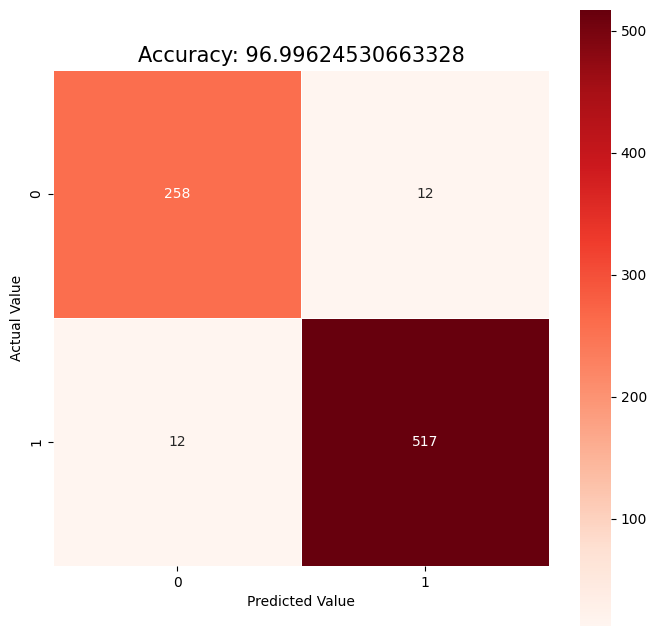

In [22]:
plt.figure(figsize=(8,8))
sns.heatmap(confutionMatrix1, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Reds')
plt.ylabel('Actual Value')
plt.xlabel('Predicted Value')
all_sample_title = 'Accuracy: {0}'.format(score*100)
plt.title(all_sample_title, size = 15)

Question c(ii)

1. The decision boundary for logistic regression is found from the equation:
    1. z = intercept + w1X1 + w2X2 + w3X1^2 + w4X2^2
        1. z is the result of the linear combination of features.
        2. w1, w2, w3, w4 are the coefficients for X1, X2, X1^2, X2^2

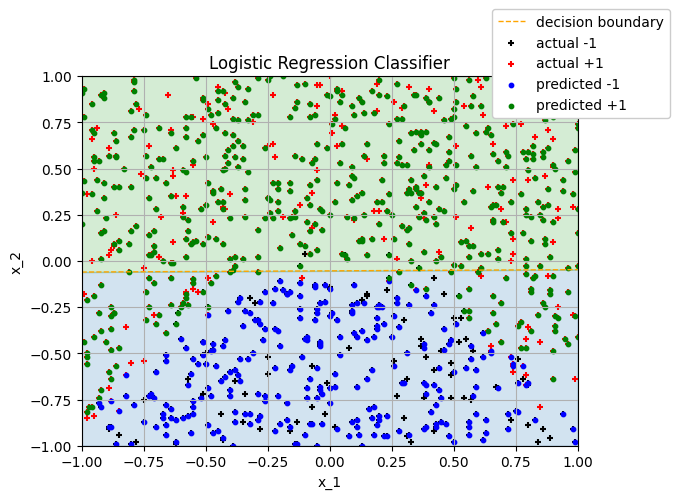

In [36]:
XX=np.column_stack((X1**2,X2**2))
interception1 = LR1.intercept_[0]
X1_coef, X2_coef, X1_squared_coef, X2_squared_coef = LR1.coef_.T
intercept_d1 = -interception1/X2_coef
slope_d1 = -X1_coef/X2_coef
x_d1 = np.array([-1, +1])
y_d1 = slope_d1 * x_d1 + intercept_d1
plt.plot(x_d1, y_d1, lw=1, c = 'orange', ls='--', label = 'decision boundary')

plt.fill_between(x_d1, y_d1, -1, color='tab:blue', alpha=0.2)
plt.fill_between(x_d1, y_d1, +1, color='tab:green', alpha=0.2)

# Plot the actual and predicted values
plt.scatter(*X[y == -1].T, s=15, c='black', marker='+', label='actual -1')
plt.scatter(*X[y == +1].T, s=15, c='red', marker='+', label='actual +1')

plt.scatter(*x_train[prediction1 == -1].T, s=10, c='blue', marker='o', label='predicted -1')
plt.scatter(*x_train[prediction1 == +1].T, s=10, c='green', marker='o', label='predicted +1')

plt.xlim(-1, +1)
plt.ylim(-1, +1)                                                                                #setting boundary
plt.xlabel('x_1')
plt.ylabel('x_2')
plt.legend(bbox_to_anchor=(1.2,1.2), loc='upper right', fancybox=True, framealpha=1,fontsize=10,ncol=1)
plt.title('Logistic Regression Classifier')
plt.grid(True)
plt.show()
#From the figure, we can see that in the prediction results, all the orange
#pluses are coincident with the blue dots, 
#and all the green dots are coincident with the red pluses, 
#which indicates that the data are consistent with the actual results.

The result for logistic regression classifier but adding square feature shows a linear decision boundary dividing predicted classes (-1 in blue and +1 in green), with some misclassified points near the boundary where actual values (black and red crosses) overlap with incorrect predictions. Overall, the model performs well but has a few errors around the boundary

Question c(iii)

1. The baseline used in this code is a constant classifier that always predicts the most common class in the dataset.
2. np.sign(statistics.mean(y)) calculates the mean of the target values (y), which are either +1 or -1.
3. If the mean is positive (i.e., there are more +1 values), it returns +1. If the mean is negative (i.e., there are more -1 values), it returns -1.
4. So, this baseline always predicts the class that appears most frequently in the data. This gives us a simple benchmark for performance comparison with the trained model.

baseline model accuracy:  0.6626626626626627
trained model accuracy:  0.9699624530663329



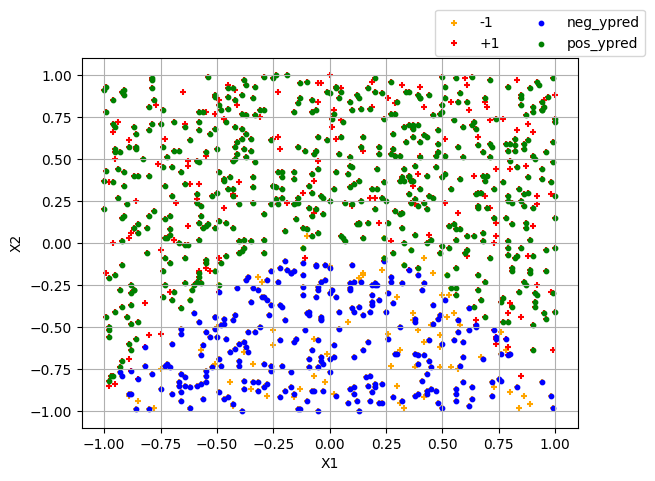

In [32]:
baseline_predictor = np.sign(statistics.mean(y))
ypred_baseline = np.full((len(y), 1), baseline_predictor)
LR_accuracy = metrics.accuracy_score(y_train1, prediction1)
baseline_accuracy = metrics.accuracy_score(y, ypred_baseline)
print("baseline model accuracy: ", baseline_accuracy)
print("trained model accuracy: ", LR_accuracy)

print()

plt.scatter(X1[y == -1], X2[y == -1],color='orange', marker="+", s = 15, label='-1')
plt.scatter(X1[y == +1], X2[y == +1],color='red', marker="+", s = 15, label ='+1')
plt.scatter(*x_train[prediction1 == -1].T,color='blue', marker="o", s = 10, label='neg_ypred')
plt.scatter(*x_train[prediction1 == +1].T,color='green', marker="o", s = 10, label='pos_ypred')
plt.xlabel("X1")
plt.ylabel("X2")
plt.legend(bbox_to_anchor=(1.15,1.15),loc='upper right',ncol=2,fontsize=10)
plt.grid(True)
plt.show()
#To create a baseline predictor, set the predictions all to constant 1 and compare the accuracy. 
#It can be found that the accuracy of the baseline model is lower than that of the model with added polynomials, 
# so the model with added polynomials performs the baseline model.

#the decision boundary is plotted as a dashed line, 
#allowing visualization of how the Logistic Regression model distinguishes between different classes, 
#taking into account the squared features.

Question c(iv)